In [1]:
! git clone https://github.com/Bhavay-Garg/Lung-Disease-Detection.git

Cloning into 'Lung-Disease-Detection'...
remote: Enumerating objects: 10118, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10118 (delta 1), reused 10 (delta 1), pack-reused 10108
Receiving objects: 100% (10118/10118), 2.17 GiB | 41.89 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (10101/10101), done.


In [1]:
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, models, transforms


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
data_transforms = transforms.Compose([
        transforms.Resize((256,256)),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

test_data_dir = '/content/Lung-Disease-Detection/Dataset'
test_image_dataset = datasets.ImageFolder("/content/Lung-Disease-Detection/Dataset/test",data_transforms)

test_dataloader = torch.utils.data.DataLoader(test_image_dataset, batch_size=4,
                                             shuffle=True, num_workers=4)
dataset_sizes = len(test_image_dataset)
class_names = test_image_dataset.classes


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [4]:
print("No. of batches in testloader:{}".format(len(test_dataloader))) 
print("No. of Total examples:{}".format(len(test_dataloader.dataset)))

No. of batches in testloader:507
No. of Total examples:2025


In [5]:
model = models.mobilenet_v3_large(pretrained=True, width_mult=1.0,  reduced_tail=False, dilated=False)
for param in model.parameters():
    param.requires_grad = False

num_ftrs = model.classifier[0].in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.classifier = nn.Linear(num_ftrs, 5)
model = model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_large-8738ca79.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_large-8738ca79.pth
100%|██████████| 21.1M/21.1M [00:00<00:00, 53.1MB/s]


In [8]:
model=torch.load('/content/MobileNet.pt')
model.eval()

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

In [11]:
actual=[]
predicted=[]
for i in  range(len(test_dataloader)):
    inputs, classes = next(iter(test_dataloader))
    
    model = model.to("cuda")
    inputs=inputs.to("cuda")
    
    outputs=model(inputs)
    _, preds = torch.max(outputs, 1)
    preds=preds.cpu().numpy()
    classes=classes.numpy()
    print(i)
    print(preds)
    print(classes)
    actual.extend(classes)
    predicted.extend(preds)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


0
[1 1 3 4]
[4 1 3 4]
1
[3 0 3 4]
[3 4 3 4]
2
[0 1 0 4]
[0 1 0 4]
3
[3 1 0 4]
[3 1 0 4]
4
[0 2 3 3]
[4 2 3 3]
5
[1 2 1 4]
[3 2 1 4]
6
[1 1 0 2]
[1 0 0 2]
7
[1 4 4 4]
[3 4 4 4]
8
[4 4 0 0]
[4 4 0 3]
9
[1 0 0 1]
[3 0 0 1]
10
[0 4 0 4]
[0 4 0 4]
11
[3 3 1 0]
[3 3 0 4]
12
[2 3 0 1]
[2 3 4 1]
13
[3 3 1 4]
[3 3 1 4]
14
[2 4 1 2]
[2 4 1 2]
15
[0 2 1 1]
[0 2 1 1]
16
[2 3 0 0]
[2 3 0 0]
17
[3 1 4 3]
[3 1 2 3]
18
[1 0 1 2]
[1 4 1 2]
19
[0 0 1 4]
[0 0 1 4]
20
[2 0 1 4]
[2 0 0 0]
21
[0 0 3 4]
[4 4 3 4]
22
[4 0 2 1]
[4 4 2 1]
23
[0 0 0 1]
[2 0 4 1]
24
[1 4 4 1]
[1 4 4 3]
25
[0 1 4 1]
[4 4 4 3]
26
[3 3 2 0]
[3 3 2 0]
27
[3 1 1 0]
[3 1 1 0]
28
[0 2 1 1]
[0 2 1 1]
29
[0 3 4 1]
[4 3 4 1]
30
[1 0 1 2]
[3 3 3 2]
31
[4 4 2 4]
[4 4 2 4]
32
[1 1 2 1]
[1 1 2 3]
33
[4 3 1 1]
[4 3 1 1]
34
[2 0 0 3]
[2 0 0 3]
35
[1 1 0 3]
[1 1 0 3]
36
[2 1 2 3]
[2 3 2 3]
37
[2 3 0 1]
[2 3 4 3]
38
[1 4 2 1]
[1 4 2 1]
39
[2 3 0 4]
[2 3 0 2]
40
[1 0 2 3]
[2 4 2 3]
41
[3 4 0 2]
[3 4 0 2]
42
[2 4 1 1]
[2 4 3 1]
43
[1 1 0 1]
[1 4 0 1

In [12]:
print("Actual: ",actual)
print("Predicted: ",predicted)

Actual:  [4, 1, 3, 4, 3, 4, 3, 4, 0, 1, 0, 4, 3, 1, 0, 4, 4, 2, 3, 3, 3, 2, 1, 4, 1, 0, 0, 2, 3, 4, 4, 4, 4, 4, 0, 3, 3, 0, 0, 1, 0, 4, 0, 4, 3, 3, 0, 4, 2, 3, 4, 1, 3, 3, 1, 4, 2, 4, 1, 2, 0, 2, 1, 1, 2, 3, 0, 0, 3, 1, 2, 3, 1, 4, 1, 2, 0, 0, 1, 4, 2, 0, 0, 0, 4, 4, 3, 4, 4, 4, 2, 1, 2, 0, 4, 1, 1, 4, 4, 3, 4, 4, 4, 3, 3, 3, 2, 0, 3, 1, 1, 0, 0, 2, 1, 1, 4, 3, 4, 1, 3, 3, 3, 2, 4, 4, 2, 4, 1, 1, 2, 3, 4, 3, 1, 1, 2, 0, 0, 3, 1, 1, 0, 3, 2, 3, 2, 3, 2, 3, 4, 3, 1, 4, 2, 1, 2, 3, 0, 2, 2, 4, 2, 3, 3, 4, 0, 2, 2, 4, 3, 1, 1, 4, 0, 1, 2, 1, 3, 2, 3, 0, 1, 3, 2, 2, 1, 1, 0, 2, 3, 4, 0, 4, 0, 1, 3, 1, 1, 2, 4, 3, 4, 0, 0, 2, 4, 2, 2, 2, 0, 4, 2, 4, 1, 4, 4, 0, 3, 2, 1, 0, 0, 2, 0, 2, 2, 3, 2, 2, 3, 1, 2, 1, 0, 4, 3, 1, 4, 0, 3, 1, 2, 0, 0, 2, 2, 0, 2, 1, 2, 3, 3, 0, 3, 0, 1, 3, 3, 4, 1, 2, 2, 4, 0, 2, 0, 1, 0, 1, 0, 3, 4, 4, 1, 0, 0, 0, 4, 2, 0, 3, 3, 0, 4, 2, 2, 1, 3, 4, 0, 4, 1, 2, 1, 4, 3, 1, 4, 0, 1, 1, 0, 3, 0, 1, 2, 0, 0, 3, 2, 1, 3, 2, 0, 4, 3, 3, 4, 1, 2, 1, 2, 3, 4, 3, 0, 4, 2, 0, 

In [13]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(actual, predicted)
confusion_matrix

array([[348,  23,   8,   0,  39],
       [  1, 388,   0,   0,   2],
       [ 13,  52, 320,   0,  23],
       [ 10, 129,   3, 268,   1],
       [149,  33,   7,   0, 211]])

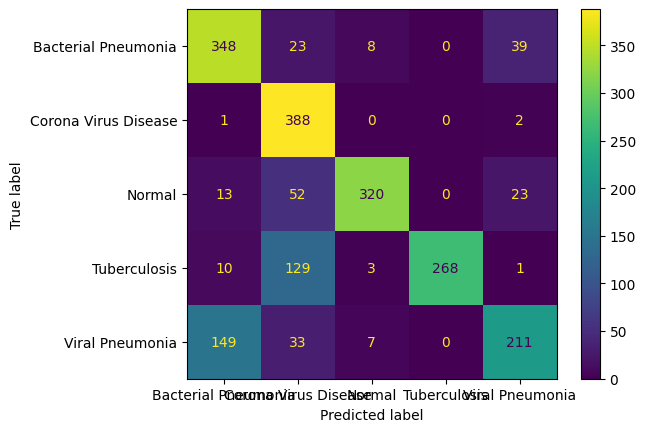

In [14]:
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels =  ["Bacterial Pneumonia","Corona Virus Disease","Normal","Tuberculosis","Viral Pneumonia"])
cm_display.plot()
plt.show()

In [16]:
Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted,average="micro")
Sensitivity_recall = metrics.recall_score(actual, predicted,average="micro")
F1_score = metrics.f1_score(actual, predicted,average="micro")
print("Accuracy:",Accuracy)
print("Precision:",Precision)
print("Sensitivity_recall:",Sensitivity_recall)
print("F1_score:",F1_score)

Accuracy: 0.7569033530571992
Precision: 0.7569033530571992
Sensitivity_recall: 0.7569033530571992
F1_score: 0.7569033530571992
